In [1]:

s3_tests=[
     "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-168/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-147/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-126/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-105/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-84/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-63/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-42/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-21/202211131246/chemprot_abstract_test.json.json"
    , "s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-0/202211131246/chemprot_abstract_test.json.json"
         ]

In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix):
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
   

    name = s3_prefix
    r = re.search(  "predictions_chemprot-adverserial-train-(\d+)-(\d+)-(\d+)", s3_prefix)
    name= s3_prefix
    train_size= int(r.group(1))
    train_pos_size= int(r.group(2))
    train_adverserial_neg= int(r.group(3))
    total_predictions= len(df)

    p,r,f,s = precision_recall_fscore_support(df["label"], 
                         df["prediction"], pos_label = 1, average="binary")
        
    return { "Name": name, 
                    "Precision":p,
                    "Recall":r,
                    "F1":f,  
                  #  "Threshold": "HighConfidence", 
                    "Support": s, 
                        "TrainSize":train_size, "TrainSizePositive": train_pos_size,
                        "TrainAdverserialNegative" : train_adverserial_neg,
                        "TrainAdverserialNegativeRate" : train_adverserial_neg/train_pos_size,
                        "PredictionsSize": total_predictions}
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s) for s in s3_prefixes]
    return pd.DataFrame(result)



In [5]:
df_stats = create_dfs_from_prefixes(s3_tests)
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize
0,s3://aegovan-data/chemprot_adverserial/predict...,0.391156,0.517241,0.445449,None,767,210,168,0.8,5744
1,s3://aegovan-data/chemprot_adverserial/predict...,0.429171,0.613193,0.504938,None,767,210,147,0.7,5744
2,s3://aegovan-data/chemprot_adverserial/predict...,0.238949,0.559220,0.334829,None,767,210,126,0.6,5744
3,s3://aegovan-data/chemprot_adverserial/predict...,0.455266,0.602699,0.518710,None,767,210,105,0.5,5744
4,s3://aegovan-data/chemprot_adverserial/predict...,0.569892,0.635682,0.600992,None,767,210,84,0.4,5744
5,s3://aegovan-data/chemprot_adverserial/predict...,0.345668,0.574213,0.431549,None,767,210,63,0.3,5744
6,s3://aegovan-data/chemprot_adverserial/predict...,0.260931,0.554723,0.354916,None,767,210,42,0.2,5744
7,s3://aegovan-data/chemprot_adverserial/predict...,0.240289,0.649175,0.350749,None,767,210,21,0.1,5744
8,s3://aegovan-data/chemprot_adverserial/predict...,0.258703,0.646177,0.369481,None,767,210,0,0.0,5744


In [6]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize
0,s3://aegovan-data/chemprot_adverserial/predict...,0.391156,0.517241,0.445449,None,767,210,168,0.8,5744
1,s3://aegovan-data/chemprot_adverserial/predict...,0.429171,0.613193,0.504938,None,767,210,147,0.7,5744
2,s3://aegovan-data/chemprot_adverserial/predict...,0.238949,0.559220,0.334829,None,767,210,126,0.6,5744
3,s3://aegovan-data/chemprot_adverserial/predict...,0.455266,0.602699,0.518710,None,767,210,105,0.5,5744
4,s3://aegovan-data/chemprot_adverserial/predict...,0.569892,0.635682,0.600992,None,767,210,84,0.4,5744
5,s3://aegovan-data/chemprot_adverserial/predict...,0.345668,0.574213,0.431549,None,767,210,63,0.3,5744
6,s3://aegovan-data/chemprot_adverserial/predict...,0.260931,0.554723,0.354916,None,767,210,42,0.2,5744
7,s3://aegovan-data/chemprot_adverserial/predict...,0.240289,0.649175,0.350749,None,767,210,21,0.1,5744
8,s3://aegovan-data/chemprot_adverserial/predict...,0.258703,0.646177,0.369481,None,767,210,0,0.0,5744


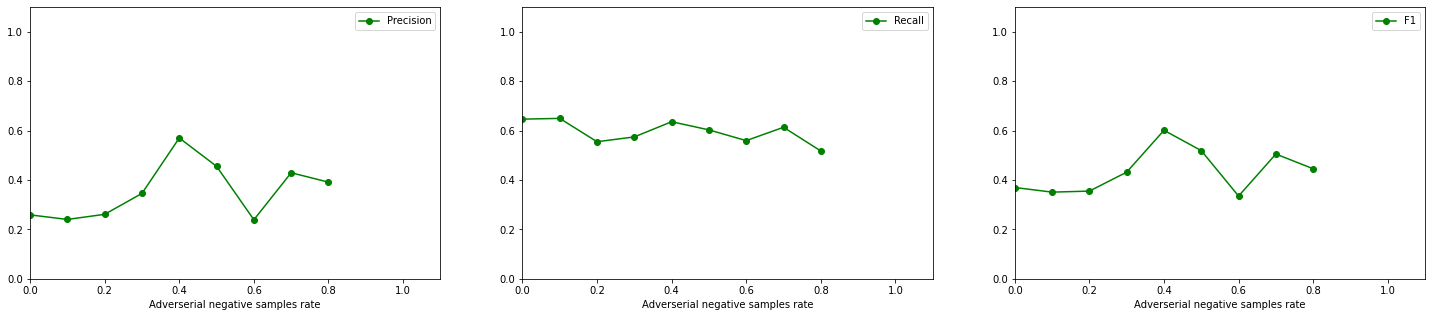

In [7]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAdverserialNegativeRate" : "Adverserial negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }

        df[["Precision", "TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(0, 1.1), ax=ax[0], color=(my_colors))

        df[["Recall","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(0, 1.1), ax=ax[1], color=(my_colors))

        df[["F1","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(0, 1.1), ax=ax[2], color=(my_colors))

       
        plt.legend()

plot_comparison(df_stats)   

In [8]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize
0,s3://aegovan-data/chemprot_adverserial/predict...,0.391156,0.517241,0.445449,None,767,210,168,0.8,5744
1,s3://aegovan-data/chemprot_adverserial/predict...,0.429171,0.613193,0.504938,None,767,210,147,0.7,5744
2,s3://aegovan-data/chemprot_adverserial/predict...,0.238949,0.559220,0.334829,None,767,210,126,0.6,5744
3,s3://aegovan-data/chemprot_adverserial/predict...,0.455266,0.602699,0.518710,None,767,210,105,0.5,5744
4,s3://aegovan-data/chemprot_adverserial/predict...,0.569892,0.635682,0.600992,None,767,210,84,0.4,5744
5,s3://aegovan-data/chemprot_adverserial/predict...,0.345668,0.574213,0.431549,None,767,210,63,0.3,5744
6,s3://aegovan-data/chemprot_adverserial/predict...,0.260931,0.554723,0.354916,None,767,210,42,0.2,5744
7,s3://aegovan-data/chemprot_adverserial/predict...,0.240289,0.649175,0.350749,None,767,210,21,0.1,5744
8,s3://aegovan-data/chemprot_adverserial/predict...,0.258703,0.646177,0.369481,None,767,210,0,0.0,5744
